#Problem

The goal of this case study is to determine if a credit line should be extended to an individual based on their attributes. Additionally, the study seeks to determine what the repayment terms should be, based on business recommendations.

In [1]:
!gdown 1M6cohBqej9Z3pVxXooP5cf_X7ZKTp-0a

Downloading...
From: https://drive.google.com/uc?id=1M6cohBqej9Z3pVxXooP5cf_X7ZKTp-0a
To: /content/LoanTap_logistic_regression.csv
100% 100M/100M [00:03<00:00, 30.1MB/s] 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('LoanTap_logistic_regression.csv')

In [17]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [18]:
df.size

10692810

In [19]:
df.shape

(396030, 27)

The dataset contains 396,030 entries and 27 columns.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

The data types include both numerical (12 columns) and categorical (15 columns) values.

loan_status : Current status of the loan - Target Variable

In [21]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


There are some missing values, particularly in the columns emp_title, emp_length, title, revol_util, mort_acc, and pub_rec_bankruptcies.

In [22]:
#for numerical features
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


1. **loan_amnt**:
   - The loan amounts range from 500 to 40,000, with a mean of about 14,114.
   
2. **int_rate**:
   - Interest rates vary from 5.32% to 30.99%, with an average rate of around 13.64%.
   
3. **installment**:
   - The monthly payments (installments) range from $16.08 to $1533.81, with an average of about $431.85.
   
4. **annual_inc**:
   - Annual income ranges widely from $0 to $8,706,582, with a median income of $64,000, indicating potential outliers on the higher end.
   
5. **dti** (Debt-to-Income ratio):
   - DTI ranges from 0 to 9999 (indicating some potential data errors or outliers), with a median of around 16.91.
   
6. **open_acc** (Open credit lines):
   - The number of open credit lines ranges from 0 to 90, with a median of 10.
   
7. **pub_rec** (Number of derogatory public records):
   - Most values are 0, but the range goes up to 86, indicating that a few borrowers have many derogatory public records.
   
8. **revol_bal** (Revolving balance):
   - Revolving balances range from $0 to $1,743,266, with a median of about $11,181.
   
9. **revol_util** (Revolving line utilization rate):
   - Utilization rates range from 0 to 892.3%, which again indicates possible data issues or outliers. The median is around 54.8%.
   
10. **total_acc** (Total number of credit lines):
    - Total credit lines range from 2 to 151, with a median of 24.
    
11. **mort_acc** (Number of mortgage accounts):
    - The number of mortgage accounts ranges from 0 to 34, with a median of 1.
    
12. **pub_rec_bankruptcies** (Number of public record bankruptcies):
    - This ranges from 0 to 8, with most people having 0 bankruptcies.

### Observations:
- **Outliers**: Several variables, like `annual_inc`, `dti`, `revol_util`, and `pub_rec`, have extreme values that suggest the presence of outliers or data entry errors.
- **Distribution**: Some variables, like `annual_inc` and `revol_bal`, have a wide range, indicating potential skewness in the data.
  

In [23]:
#for categorical features
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8



1. **term**:
   - **Unique Values**: 2 (36 months, 60 months)
   - **Most Frequent Value (top)**: 36 months
   - **Frequency of Most Frequent Value**: 302,005
   
2. **grade**:
   - **Unique Values**: 7 (A, B, C, D, E, F, G)
   - **Most Frequent Value (top)**: B
   - **Frequency of Most Frequent Value**: 116,018
   
3. **sub_grade**:
   - **Unique Values**: 35 (B1, B2, B3, etc.)
   - **Most Frequent Value (top)**: B3
   - **Frequency of Most Frequent Value**: 26,655
   
4. **emp_title**:
   - **Unique Values**: 173,105
   - **Most Frequent Value (top)**: Teacher
   - **Frequency of Most Frequent Value**: 4,389
   
5. **emp_length**:
   - **Unique Values**: 11 (0 years, 1 year, ... 10+ years)
   - **Most Frequent Value (top)**: 10+ years
   - **Frequency of Most Frequent Value**: 126,041
   
6. **home_ownership**:
   - **Unique Values**: 6 (RENT, MORTGAGE, OWN, etc.)
   - **Most Frequent Value (top)**: MORTGAGE
   - **Frequency of Most Frequent Value**: 198,348
   
7. **verification_status**:
   - **Unique Values**: 3 (Verified, Not Verified, Source Verified)
   - **Most Frequent Value (top)**: Verified
   - **Frequency of Most Frequent Value**: 139,563
   
8. **issue_d**:
   - **Unique Values**: 115 (Different months/years)
   - **Most Frequent Value (top)**: Oct-2014
   - **Frequency of Most Frequent Value**: 14,846
   
9. **loan_status**:
   - **Unique Values**: 2 (Fully Paid, Charged Off)
   - **Most Frequent Value (top)**: Fully Paid
   - **Frequency of Most Frequent Value**: 318,357
   
10. **purpose**:
    - **Unique Values**: 14 (debt_consolidation, credit_card, home_improvement, etc.)
    - **Most Frequent Value (top)**: debt_consolidation
    - **Frequency of Most Frequent Value**: 234,507
    
11. **title**:
    - **Unique Values**: 48,816
    - **Most Frequent Value (top)**: Debt consolidation
    - **Frequency of Most Frequent Value**: 152,472
    
12. **earliest_cr_line**:
    - **Unique Values**: 684 (Different months/years)
    - **Most Frequent Value (top)**: Oct-2000
    - **Frequency of Most Frequent Value**: 3,017
    
13. **initial_list_status**:
    - **Unique Values**: 2 (f, w)
    - **Most Frequent Value (top)**: f
    - **Frequency of Most Frequent Value**: 238,066
    
14. **application_type**:
    - **Unique Values**: 3 (INDIVIDUAL, JOINT, etc.)
    - **Most Frequent Value (top)**: INDIVIDUAL
    - **Frequency of Most Frequent Value**: 395,319
    
15. **address**:
    - **Unique Values**: 393,700
    - **Most Frequent Value (top)**: USCGC Smith, FPO AE 70466
    - **Frequency of Most Frequent Value**: 8

### Observations:

1. **High Cardinality**: Features like `emp_title`, `title`, and `address` have very high cardinality (many unique values), which could be challenging for modeling. We may need to group these or use techniques like target encoding.
   
2. **Most Frequent Values**: Some categories dominate their respective features, like `MORTGAGE` in `home_ownership` and `Fully Paid` in `loan_status`. This can influence the distribution of the data and might require balancing.

3. **Potential for Grouping**: For features like `purpose` and `emp_length`, categories can potentially be grouped to reduce complexity.


In [24]:
continuous_vars = df.select_dtypes(include=['number']).columns
continuous_vars


Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [25]:
len(continuous_vars)

12

In [26]:

# Remove inplace=True
dropped_df = df.drop(['emp_title','title','address'],axis=1)



In [27]:
categorical_vars = dropped_df.select_dtypes(include=['object']).columns
categorical_vars

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type'],
      dtype='object')

In [28]:
len(categorical_vars)

12

conversion of categorical attributes to 'category' (If required)

In [29]:
# List of columns to convert to 'category'
columns_to_convert = ['term', 'grade', 'sub_grade', 'emp_length']

# Convert the selected columns to 'category'
for col in columns_to_convert:
    dropped_df[col] = dropped_df[col].astype('category')

# Verify the data types after conversion
print(dropped_df.dtypes)


loan_amnt                float64
term                    category
int_rate                 float64
installment              float64
grade                   category
sub_grade               category
emp_length              category
home_ownership            object
annual_inc               float64
verification_status       object
issue_d                   object
loan_status               object
purpose                   object
dti                      float64
earliest_cr_line          object
open_acc                 float64
pub_rec                  float64
revol_bal                float64
revol_util               float64
total_acc                float64
initial_list_status       object
application_type          object
mort_acc                 float64
pub_rec_bankruptcies     float64
dtype: object


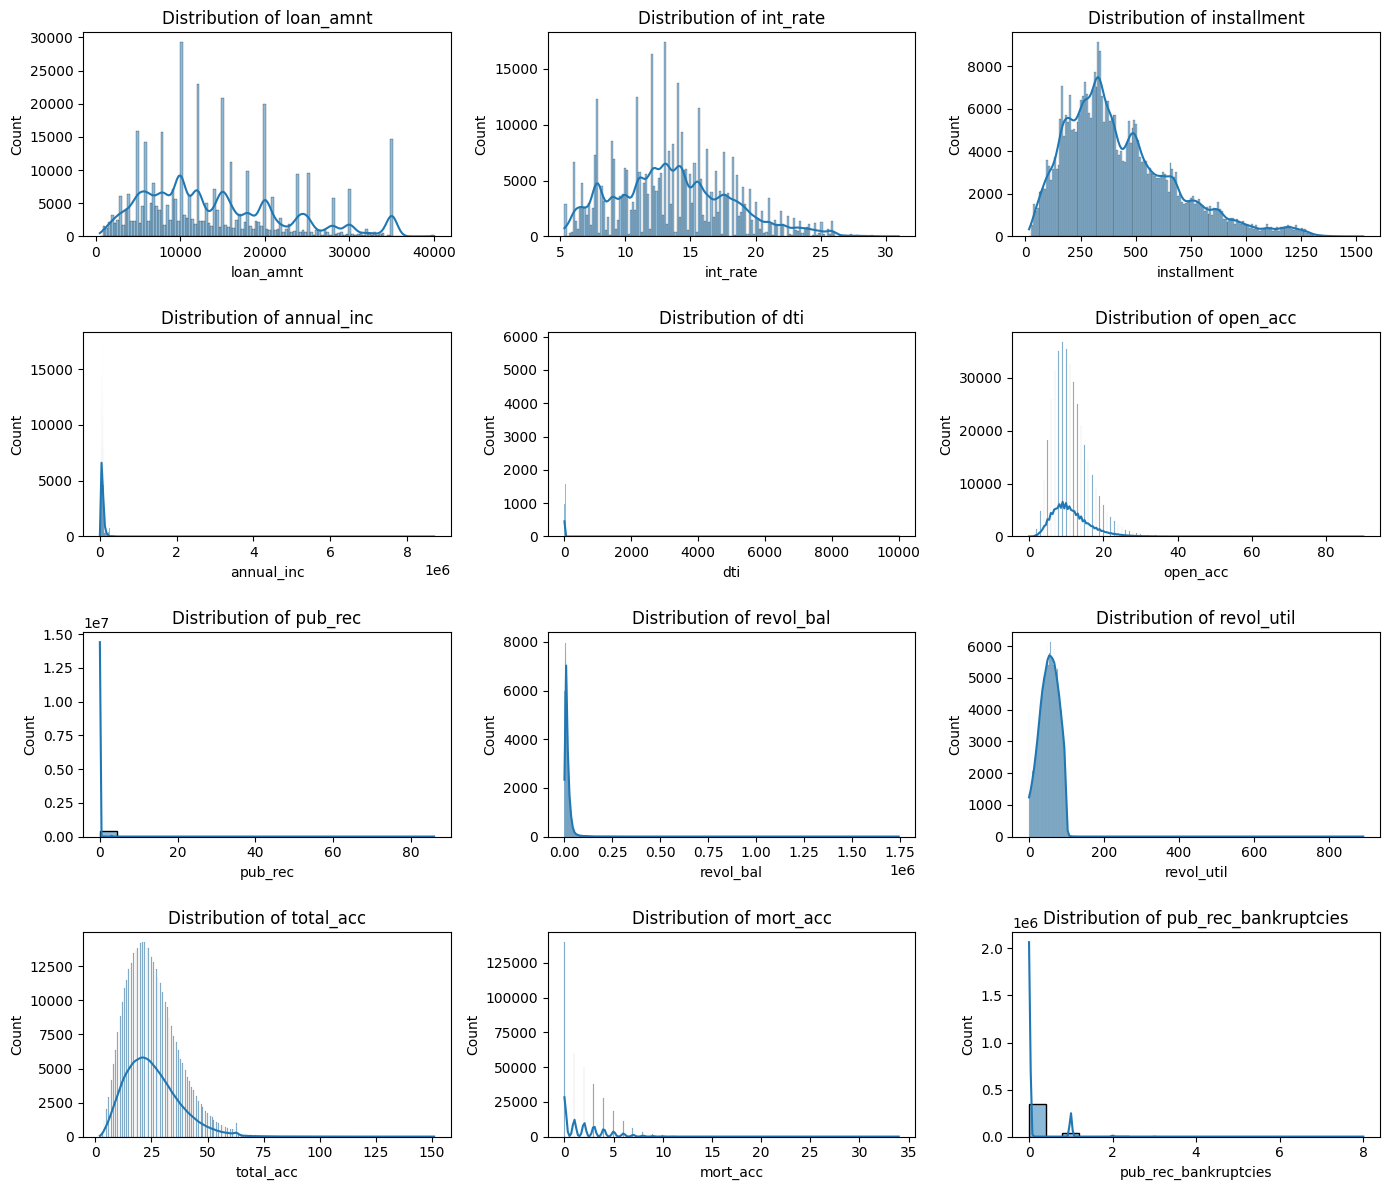

In [30]:

# Univariate analysis - Continuous Variables
# Plotting distribution for continuous variables
plt.figure(figsize=(14, 12))
for i, var in enumerate(continuous_vars):
    plt.subplot(4, 3, i+1)  # Adjusted to 4x3 grid
    sns.histplot(dropped_df[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

### 1. **Loan Amount (`loan_amnt`)**:
   - The distribution is fairly uniform with peaks at certain common loan amounts like 10,000, 15,000, 20,000, and 35,000. This suggests that borrowers tend to apply for round, significant amounts.

### 2. **Interest Rate (`int_rate`)**:
   - The distribution is right-skewed, with a higher concentration of loans having interest rates between 10% and 20%. Few loans have rates above 25%, which might indicate riskier loans.

### 3. **Installment (`installment`)**:
   - The distribution of installments is right-skewed, with most loans having a monthly payment between $200 and $600. A few loans have significantly higher installments, which could be indicative of larger loan amounts or higher interest rates.

### 4. **Annual Income (`annual_inc`)**:
   - The annual income distribution is heavily right-skewed, with most borrowers earning below $200,000. There are some extreme outliers where income exceeds $1 million, which could be genuine high-income borrowers or potential data entry errors.

### 5. **Debt-to-Income Ratio (`dti`)**:
   - The distribution is also right-skewed, with most borrowers having a DTI ratio below 40. There are some extreme values above 1000, which suggests possible outliers or data entry issues.

### 6. **Open Credit Lines (`open_acc`)**:
   - The distribution shows that most borrowers have between 5 and 20 open credit lines. A few have significantly more, which might indicate higher credit usage or availability.

### 7. **Derogatory Public Records (`pub_rec`)**:
   - Most borrowers have 0 public records, which is expected. However, a small number of borrowers have multiple derogatory records, with a few outliers having more than 20.

### 8. **Revolving Balance (`revol_bal`)**:
   - The revolving balance distribution is right-skewed, with most borrowers carrying balances below $50,000. A few outliers have much higher balances, which might indicate heavy reliance on revolving credit.

### 9. **Revolving Utilization Rate (`revol_util`)**:
   - This distribution shows that most borrowers have a utilization rate below 100%, but there are some extreme outliers with utilization rates above 200%, which indicates potential data errors or extreme credit overuse.

### 10. **Total Credit Lines (`total_acc`)**:
   - The distribution is right-skewed, with most borrowers having between 10 and 40 total credit lines. A few borrowers have significantly more, indicating higher credit exposure.

### 11. **Mortgage Accounts (`mort_acc`)**:
   - Most borrowers have 0 or 1 mortgage account. Some have multiple mortgage accounts, which is less common.

### 12. **Public Record Bankruptcies (`pub_rec_bankruptcies`)**:
   - Most borrowers have no record of bankruptcy, but a small number have 1 or 2. There are some extreme cases with more than 2 bankruptcies, which could indicate higher risk or data issues.

### Key Insights:
- **Outliers**: Many features show the presence of outliers, especially in `annual_inc`, `dti`, `revol_bal`, and `revol_util`. These outliers may need to be treated or investigated further.
- **Right-Skewed Distributions**: Most variables are right-skewed, which is typical in financial data where most borrowers fall within a standard range, but a few extreme cases push the distribution tail.
- **Potential Data Quality Issues**: Features like `dti` and `revol_util` have values that seem unrealistic (e.g., DTI above 1000 or revol_util above 200%). These should be further investigated for data quality issues.


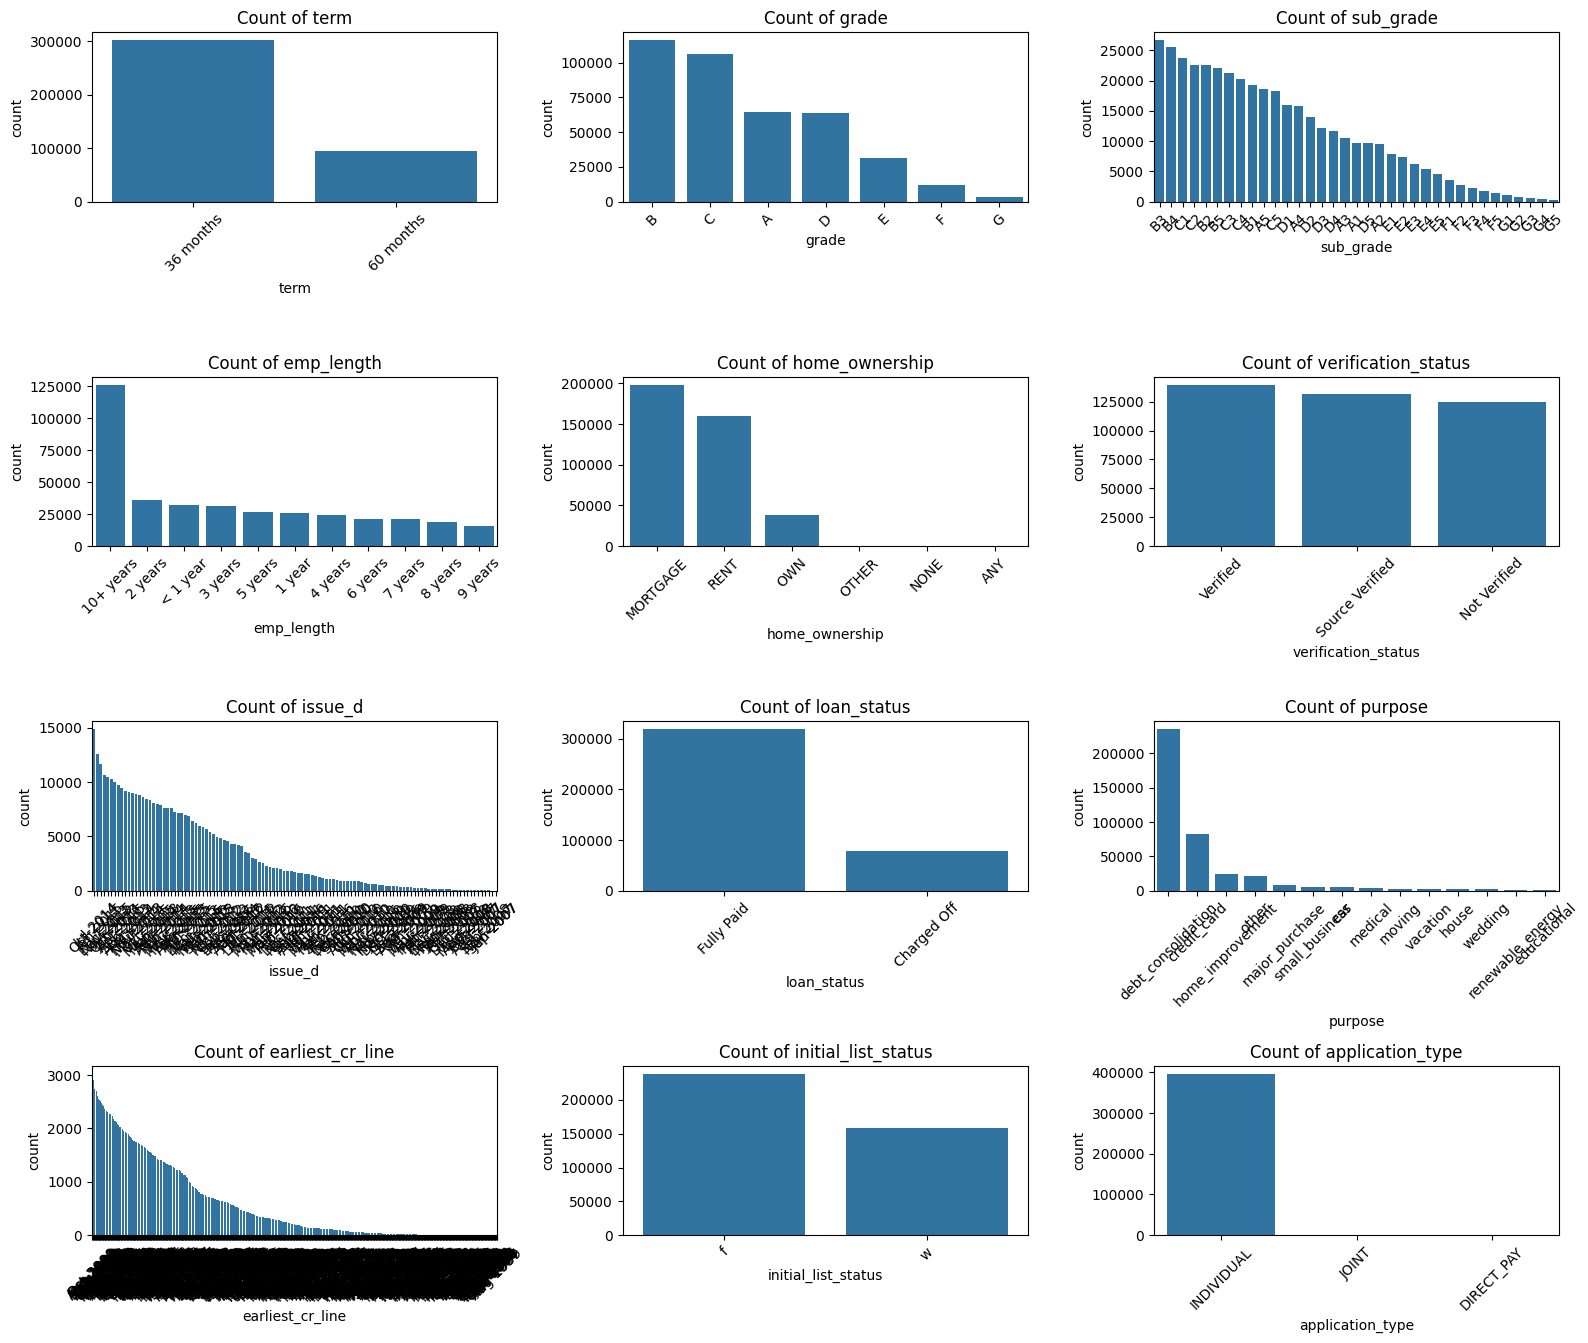

In [31]:
# Univariate analysis - Categorical Variables
# Plotting count plots for categorical variables
plt.figure(figsize=(16, 16))
for i, var in enumerate(categorical_vars):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=dropped_df[var], order=dropped_df[var].value_counts().index)
    plt.title(f'Count of {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 1. **Term (`term`)**:
   - **Observation**: The majority of the loans have a term of 36 months, with far fewer loans having a term of 60 months. This suggests that borrowers prefer shorter-term loans, possibly due to lower overall interest costs.

### 2. **Grade (`grade`)**:
   - **Observation**: The grades are distributed across the spectrum, with grade B being the most common, followed by grades C and A. Higher grades (A, B, C) are more frequent, indicating that most loans are of moderate to lower risk.

### 3. **Sub-grade (`sub_grade`)**:
   - **Observation**: The sub-grade distribution shows a finer breakdown of the grade, with B3 being the most common sub-grade. The distribution is fairly even across the different sub-grades, reflecting the broader grade distribution.

### 4. **Employment Length (`emp_length`)**:
   - **Observation**: Most borrowers have more than 10 years of employment, which is the most frequent category. This indicates that many borrowers have a stable employment history, which might be a positive indicator for loan approval.

### 5. **Home Ownership (`home_ownership`)**:
   - **Observation**: The majority of borrowers either have a mortgage or rent their homes, with mortgages being slightly more common. Home ownership status can be an important indicator of financial stability.

### 6. **Verification Status (`verification_status`)**:
   - **Observation**: The distribution is fairly balanced across the three verification statuses, with "Verified" and "Source Verified" being slightly more common than "Not Verified". Verification status might play a role in assessing the reliability of income data.

### 7. **Loan Status (`loan_status`)**:
   - **Observation**: The majority of loans are "Fully Paid", while a smaller proportion has been "Charged Off". This indicates that most borrowers are able to repay their loans, but a non-negligible proportion still defaults.

### 8. **Purpose (`purpose`)**:
   - **Observation**: The most common purpose for taking a loan is "debt_consolidation", followed by "credit_card" and "home_improvement". This suggests that many borrowers are looking to manage existing debt or improve their financial situation rather than fund new purchases.

### 9. **Initial List Status (`initial_list_status`)**:
   - **Observation**: The majority of loans have an initial list status of 'f', with fewer having 'w'. This could relate to how loans are initially evaluated or listed on the platform.

### 10. **Application Type (`application_type`)**:
   - **Observation**: Almost all applications are individual applications, with very few joint applications. This suggests that most borrowers are applying on their own rather than with a co-borrower.

### Key Insights:
- **Dominant Categories**: Some features, like `term`, `loan_status`, and `application_type`, have dominant categories. For example, most loans are for 36 months, and most borrowers apply individually and repay their loans fully.
- **Risk Indicators**: Features like `grade`, `emp_length`, and `home_ownership` could be key indicators of risk. For example, higher grades and longer employment lengths might correlate with lower default rates.
- **Loan Purpose**: The fact that debt consolidation is the most common purpose suggests that many borrowers are using these loans to manage existing debt, which could influence their risk profile.


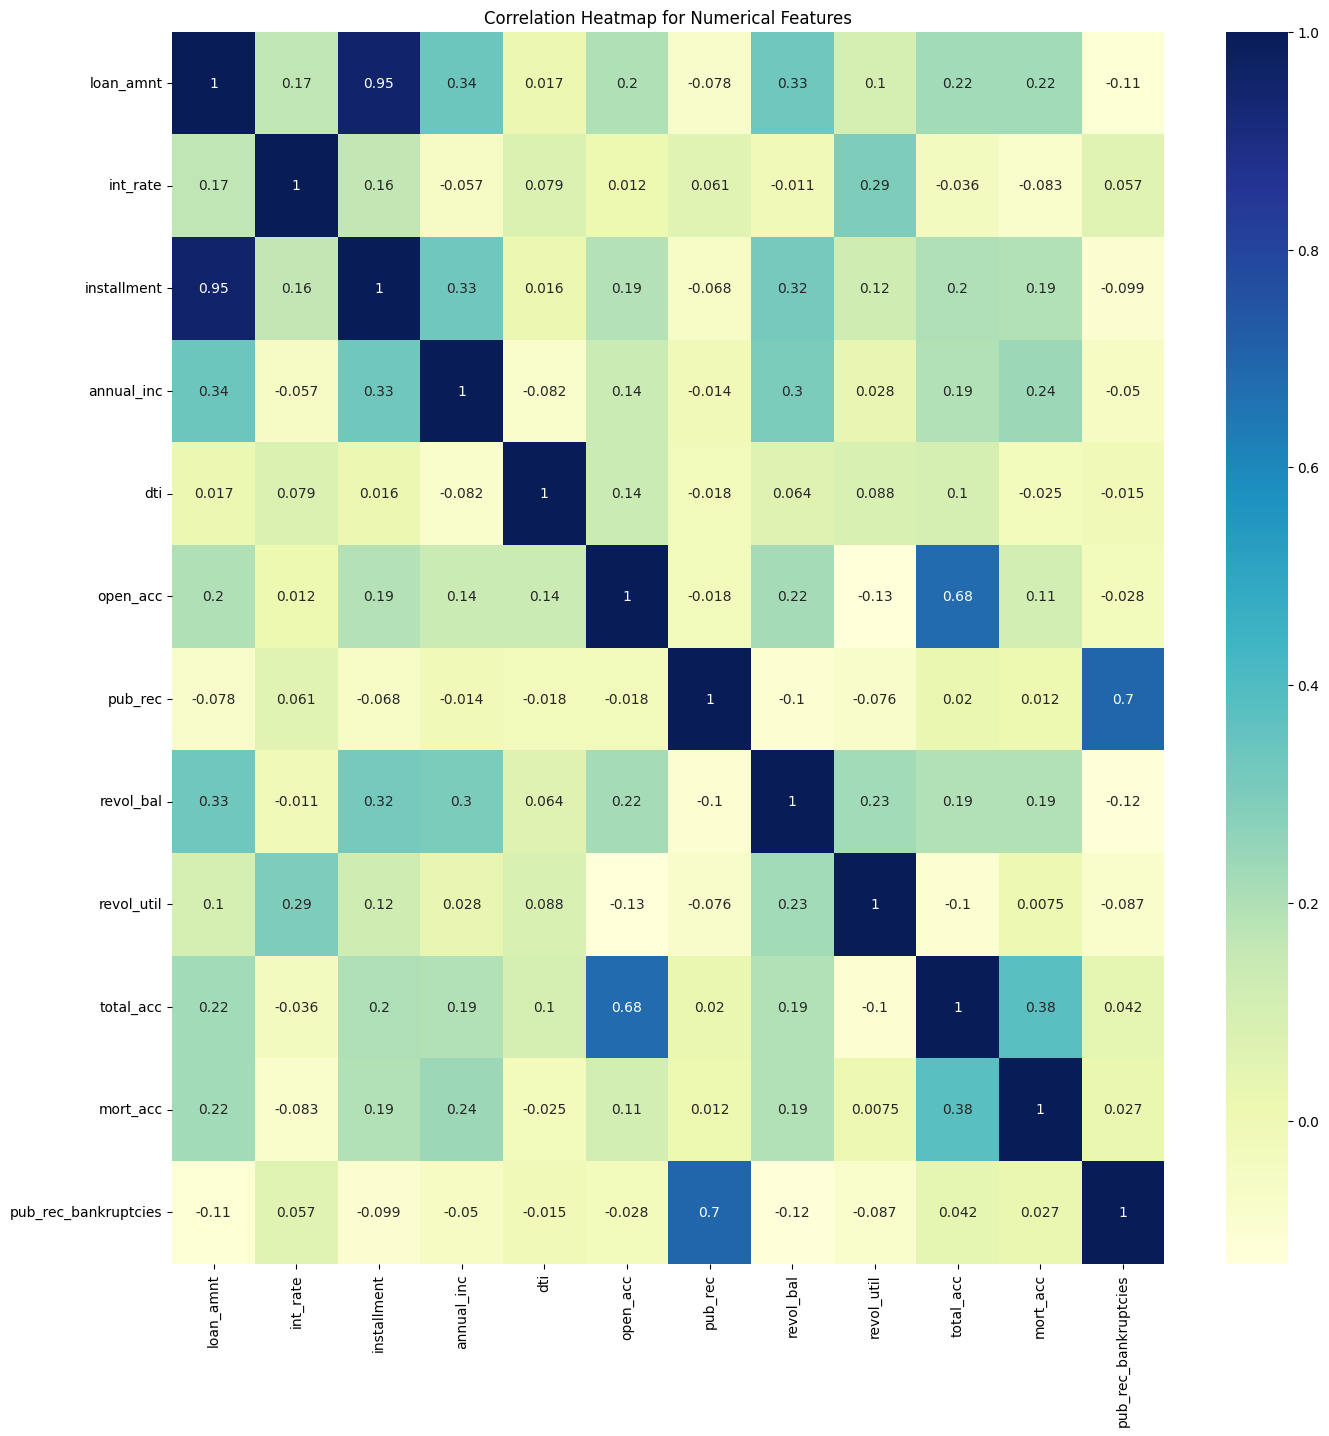

In [32]:
#Bivariate Analysis (Relationships between important variable)
continuous_data = dropped_df.select_dtypes(include=['number'])
correlation_matrix = continuous_data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap for Numerical Features")
plt.show()


1. **High Correlations**:
   - **`loan_amnt` and `installment` (0.95)**: There's a very high positive correlation between the loan amount and the installment. This makes sense because larger loans generally result in higher monthly payments.
   - **`pub_rec_bankruptcies` and `pub_rec` (0.70)**: There is a strong correlation between the number of public record bankruptcies and the number of derogatory public records. This suggests that as the number of bankruptcies increases, the number of other derogatory public records also tends to increase.
   - **`total_acc` and `open_acc` (0.68)**: There is a strong correlation between the total number of credit accounts and the number of open accounts, which is logical since open accounts contribute to the total number of accounts.

2. **Moderate Correlations**:
   - **`annual_inc` and `loan_amnt` (0.34)**: There is a moderate positive correlation between annual income and the loan amount, indicating that individuals with higher incomes tend to take out larger loans.
   - **`revol_bal` and `loan_amnt` (0.33)**: There's a moderate correlation between revolving balance and loan amount, suggesting that those with higher revolving balances may also be borrowing more.

3. **Low to Negligible Correlations**:
   - **`int_rate` and most other variables**: The interest rate has low correlations with other variables, suggesting that it is not strongly influenced by most of these features.
   - **`dti` and other variables**: Debt-to-Income ratio shows low correlations with other features, indicating that it may act independently of these variables in terms of its influence on loan decisions.

4. **Negative Correlations**:
   - **`pub_rec_bankruptcies` and `loan_amnt` (-0.11)**: There is a slight negative correlation, indicating that higher numbers of bankruptcies are slightly associated with lower loan amounts.
   - **`pub_rec` and `loan_amnt` (-0.078)**: Similar to bankruptcies, a higher number of public records correlates slightly with lower loan amounts.



In [33]:
#Duplicate value check
dropped_df.duplicated().sum()

0

#dropping unnecessary columns

In [34]:
high_cardinality = dropped_df.select_dtypes(include=['object']).nunique()
print(high_cardinality)


home_ownership           6
verification_status      3
issue_d                115
loan_status              2
purpose                 14
earliest_cr_line       684
initial_list_status      2
application_type         3
dtype: int64


In [35]:
#Missing value treatment
missing_values = dropped_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

emp_length              18301
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64


emp_length, mort_acc - categorical

revol_util, pub_rec_bankruptcies   - numerical               

In [36]:
target = 'loan_status'

In [37]:
print(dropped_df.select_dtypes(include=['object', 'category']).info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   term                 396030 non-null  category
 1   grade                396030 non-null  category
 2   sub_grade            396030 non-null  category
 3   emp_length           377729 non-null  category
 4   home_ownership       396030 non-null  object  
 5   verification_status  396030 non-null  object  
 6   issue_d              396030 non-null  object  
 7   loan_status          396030 non-null  object  
 8   purpose              396030 non-null  object  
 9   earliest_cr_line     396030 non-null  object  
 10  initial_list_status  396030 non-null  object  
 11  application_type     396030 non-null  object  
dtypes: category(4), object(8)
memory usage: 25.7+ MB
None


In [38]:
# Get the number of unique values for each column with 'object' or 'category' data type
unique_values = dropped_df.select_dtypes(include=['object', 'category']).nunique()
print(unique_values)



term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           6
verification_status      3
issue_d                115
loan_status              2
purpose                 14
earliest_cr_line       684
initial_list_status      2
application_type         3
dtype: int64


# label encoding for ordinal data, where the order of categories is meaningful, and target encoding for the remaining categorical variables

In [39]:
from sklearn.preprocessing import LabelEncoder

ordinal_columns = ['term', 'grade', 'sub_grade', 'emp_length']

# Apply label encoding
label_encoders = {}
for col in ordinal_columns:
    le = LabelEncoder()
    dropped_df[col] = le.fit_transform(dropped_df[col])
    label_encoders[col] = le  # Store the encoder for potential inverse transformation later


In [40]:

dropped_df['loan_status'] = dropped_df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)


In [41]:
# Define columns to apply target encoding
target_encoding_columns = ['home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']

#Apply target encoding using transform for categorical columns

for col in target_encoding_columns:
    # Replace each category with the mean target value for that category
    dropped_df[col] = dropped_df.groupby(col)['loan_status'].transform('mean')


In [42]:
print(dropped_df.head())

   loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
0    10000.0     0     11.44       329.48      1          8           1   
1     8000.0     0     11.99       265.68      1          9           4   
2    15600.0     0     10.49       506.97      1          7          10   
3     7200.0     0      6.49       220.65      0          1           6   
4    24375.0     1     17.27       609.33      2         14           9   

   home_ownership  annual_inc  verification_status  ... earliest_cr_line  \
0        0.773378    117000.0             0.853640  ...         Jun-1990   
1        0.830439     65000.0             0.853640  ...         Jul-2004   
2        0.773378     43057.0             0.785257  ...         Aug-2007   
3        0.773378     54000.0             0.853640  ...         Sep-2006   
4        0.830439     55000.0             0.776789  ...         Mar-1999   

   open_acc  pub_rec  revol_bal revol_util  total_acc  initial_list_status  \
0      16.0   

In [43]:
dropped_df['issue_d'].head(), dropped_df['earliest_cr_line'].head()

(0    Jan-2015
 1    Jan-2015
 2    Jan-2015
 3    Nov-2014
 4    Apr-2013
 Name: issue_d, dtype: object,
 0    Jun-1990
 1    Jul-2004
 2    Aug-2007
 3    Sep-2006
 4    Mar-1999
 Name: earliest_cr_line, dtype: object)

In [44]:
dropped_df['earliest_cr_line']

,earliest_cr_line
0,Jun-1990
1,Jul-2004
2,Aug-2007
3,Sep-2006
4,Mar-1999
...,...
396025,Nov-2004
396026,Feb-2006
396027,Mar-1997
396028,Nov-1990


In [45]:
#handling date value features
# Define the date format
date_format = '%b-%Y'

# Convert 'issue_d' to datetime
dropped_df['issue_d'] = pd.to_datetime(dropped_df['issue_d'], format=date_format)

# Convert 'earliest_cr_line' to datetime
dropped_df['earliest_cr_line'] = pd.to_datetime(dropped_df['earliest_cr_line'], format=date_format)


In [46]:
# Extract year and month from 'issue_d'
dropped_df['issue_year'] = dropped_df['issue_d'].dt.year
dropped_df['issue_month'] = dropped_df['issue_d'].dt.month

# Extract year and month from 'earliest_cr_line'
dropped_df['earliest_cr_year'] = dropped_df['earliest_cr_line'].dt.year
dropped_df['earliest_cr_month'] = dropped_df['earliest_cr_line'].dt.month


In [47]:
# Calculate the difference in years and months between 'issue_d' and 'earliest_cr_line'
dropped_df['credit_age_months'] = (dropped_df['issue_d'].dt.year - dropped_df['earliest_cr_line'].dt.year) * 12 + (dropped_df['issue_d'].dt.month - dropped_df['earliest_cr_line'].dt.month)

# Alternatively, calculate in years by dividing months by 12
dropped_df['credit_age_years'] = dropped_df['credit_age_months'] / 12

# Check the results
print(dropped_df[['credit_age_months', 'credit_age_years']].head())


   credit_age_months  credit_age_years
0                295         24.583333
1                126         10.500000
2                 89          7.416667
3                 98          8.166667
4                169         14.083333


In [48]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  int64         
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  int64         
 5   sub_grade             396030 non-null  int64         
 6   emp_length            396030 non-null  int64         
 7   home_ownership        396030 non-null  float64       
 8   annual_inc            396030 non-null  float64       
 9   verification_status   396030 non-null  float64       
 10  issue_d               396030 non-null  datetime64[ns]
 11  loan_status           396030 non-null  int64         
 12  purpose               396030 non-null  float64       
 13 

In [49]:
print(dropped_df.head())

   loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
0    10000.0     0     11.44       329.48      1          8           1   
1     8000.0     0     11.99       265.68      1          9           4   
2    15600.0     0     10.49       506.97      1          7          10   
3     7200.0     0      6.49       220.65      0          1           6   
4    24375.0     1     17.27       609.33      2         14           9   

   home_ownership  annual_inc  verification_status  ... initial_list_status  \
0        0.773378    117000.0             0.853640  ...            0.799245   
1        0.830439     65000.0             0.853640  ...            0.806940   
2        0.773378     43057.0             0.785257  ...            0.806940   
3        0.773378     54000.0             0.853640  ...            0.806940   
4        0.830439     55000.0             0.776789  ...            0.806940   

   application_type  mort_acc  pub_rec_bankruptcies issue_year  issue_mont

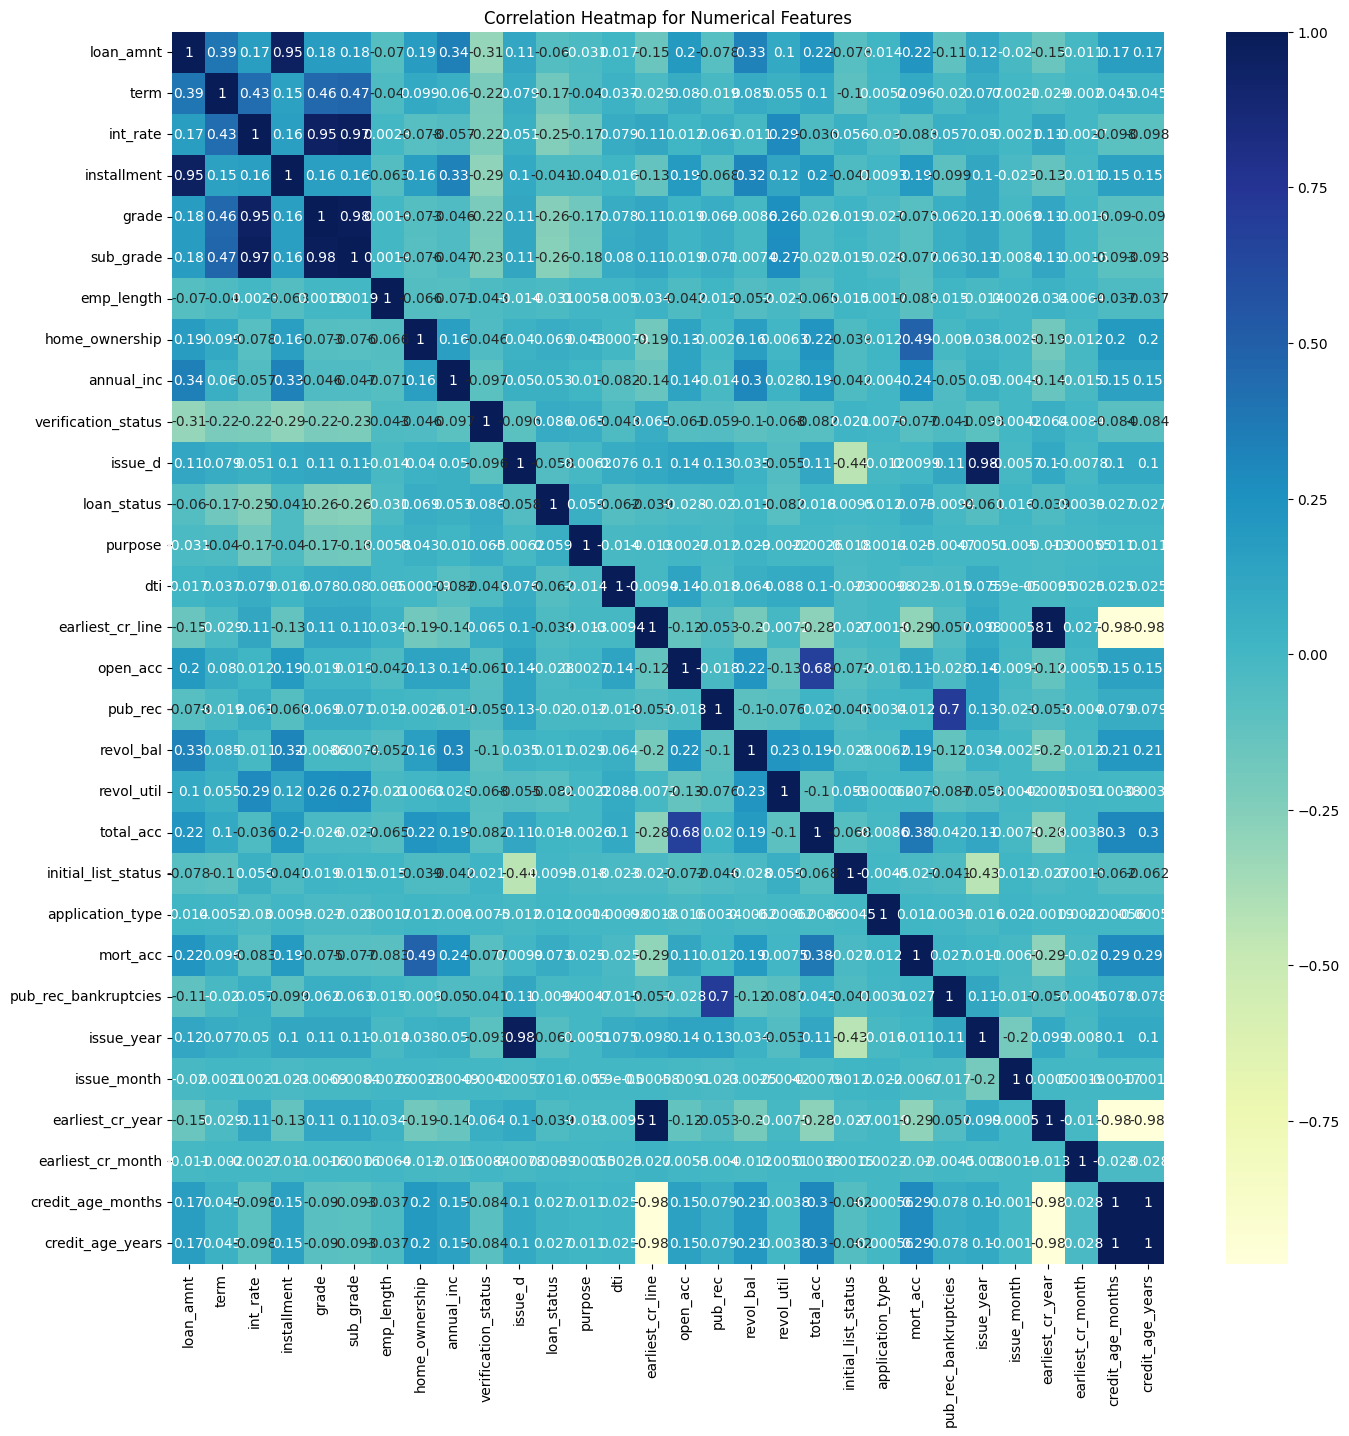

In [50]:
dropped_corr = dropped_df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(dropped_corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

In [51]:
dropped_df.drop(['sub_grade','credit_age_years', 'earliest_cr_year', 'issue_year', 'issue_d', 'earliest_cr_line'],axis=1,inplace=True)

In [52]:
dropped_df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0
loan_status,0


In [53]:
#Missing value treatment - use knn
from sklearn.impute import KNNImputer

# Select the columns that will be used for KNN imputation (must be numerical)
columns_for_imputation = ['revol_util', 'mort_acc', 'pub_rec_bankruptcies']

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the KNN imputer to the selected columns
# Note: If you want to impute all columns, use dropped_df instead of dropped_df[columns_for_imputation]
imputed_values = knn_imputer.fit_transform(dropped_df[columns_for_imputation])

# Replace the original columns with the imputed values
dropped_df[columns_for_imputation] = imputed_values

# Verify that there are no more missing values
print(dropped_df.isna().sum())


loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
issue_month             0
earliest_cr_month       0
credit_age_months       0
dtype: int64


In [54]:
from sklearn.model_selection import train_test_split

x = dropped_df.drop('loan_status', axis=1)
y = dropped_df['loan_status']

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set size:", x_train.shape[0])
print("Testing set size:", x_test.shape[0])

Training set size: 316824
Testing set size: 79206


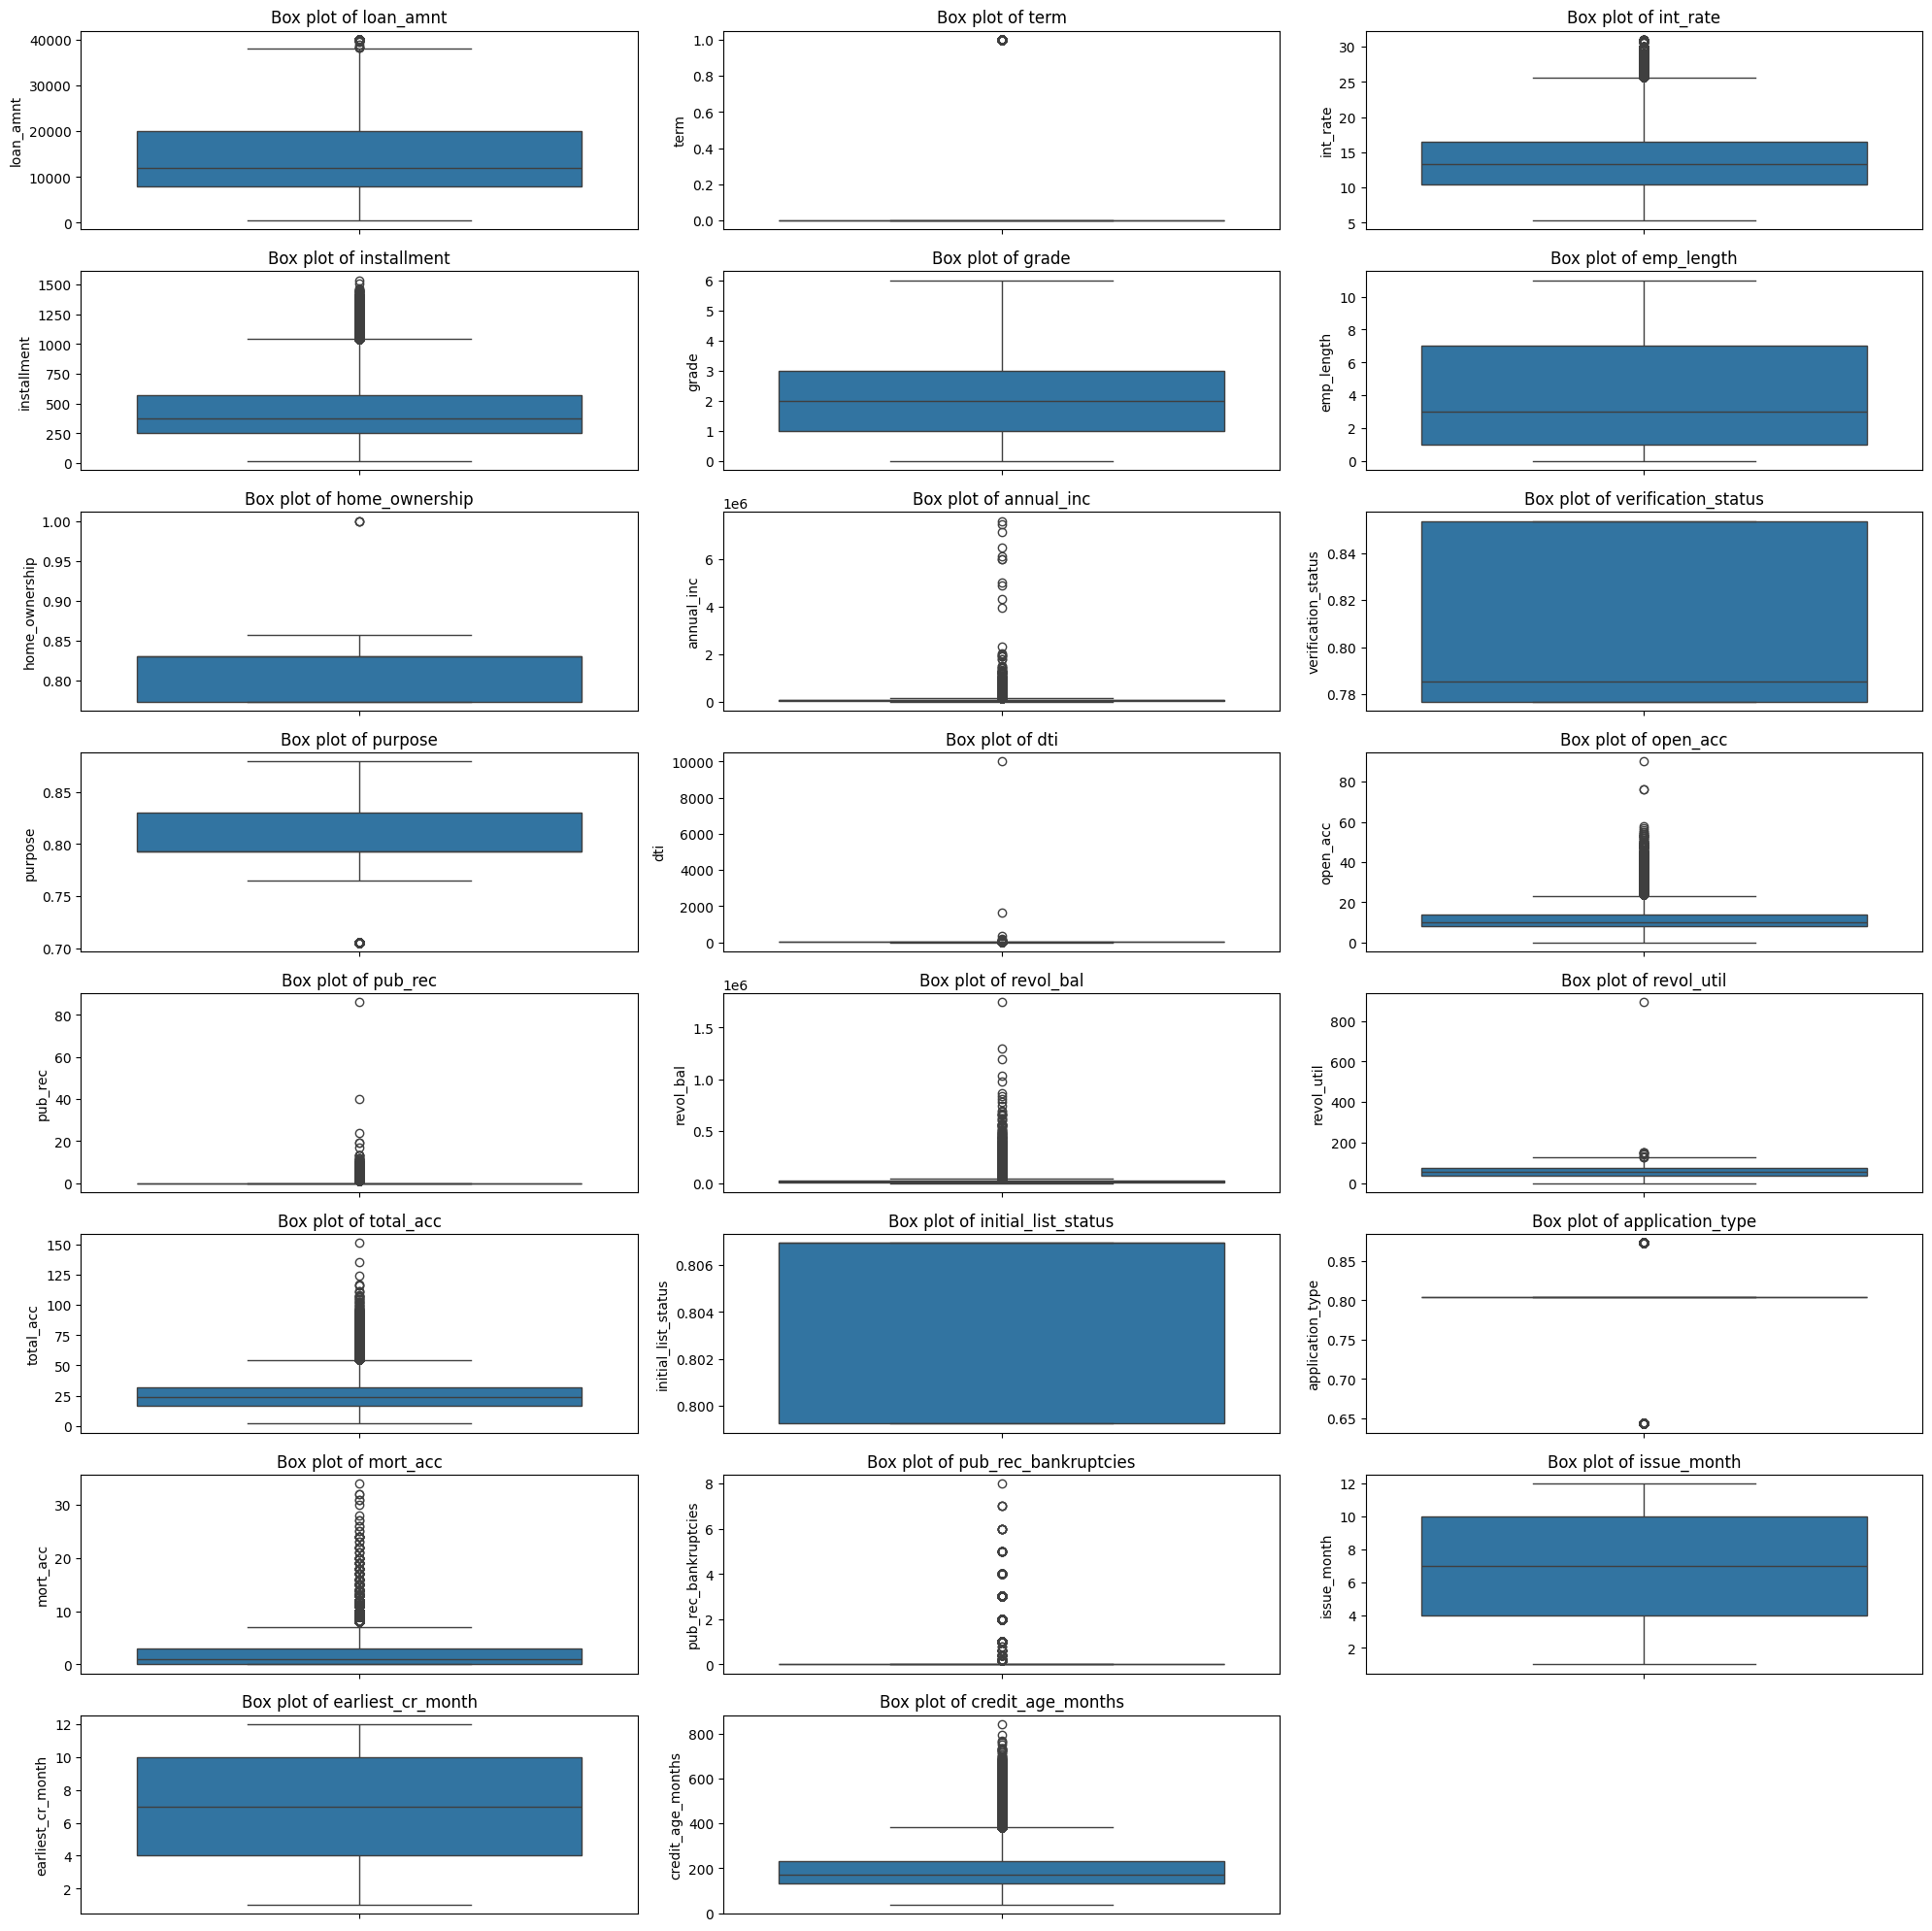

In [55]:

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Loop through each numerical feature and create a subplot
for i, col in enumerate(x_train.columns, 1):
    plt.subplot((len(x_train.columns) // 3) + 1, 3, i)  # Adjust grid size (3 columns)
    sns.boxplot(y=x_train[col])
    plt.title(f'Box plot of {col}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()



1. **Loan Amount (`loan_amnt`)**:
   - The distribution is relatively symmetric, but there are some outliers on the higher end (near $40,000).

2. **Term (`term`)**:
   - This is a binary feature with two categories (36 months and 60 months). No outliers as expected for a categorical feature.

3. **Interest Rate (`int_rate`)**:
   - The distribution is fairly narrow, but there are some outliers, especially at the higher end of the interest rates.

4. **Installment (`installment`)**:
   - Similar to `loan_amnt`, this feature has outliers at the higher end, which makes sense as it correlates with the loan amount.

5. **Grade (`grade`)**:
   - As an ordinal categorical feature, the distribution is spread across the grades, but no extreme outliers are present.

6. **Employment Length (`emp_length`)**:
   - Most values are clustered around the higher employment lengths (e.g., 10+ years). No significant outliers.

7. **Annual Income (`annual_inc`)**:
   - There are clear outliers on the higher end, with some very high-income values that are not typical for most borrowers.

8. **Debt-to-Income Ratio (`dti`)**:
   - The distribution is skewed with outliers at the higher end, indicating some borrowers have very high DTI ratios.

9. **Open Credit Lines (`open_acc`)**:
   - There are outliers for borrowers with a very high number of open credit lines.

10. **Revolving Balance (`revol_bal`)**:
    - The distribution shows significant outliers at the higher end, indicating some borrowers carry very high balances.

11. **Revolving Utilization Rate (`revol_util`)**:
    - There are some outliers above 100%, which could be data entry errors or extreme cases.

12. **Total Accounts (`total_acc`)**:
    - The distribution has outliers on the higher end, indicating borrowers with a very large number of total accounts.

13. **Mortgage Accounts (`mort_acc`)**:
    - There are outliers for borrowers with many mortgage accounts.

14. **Public Record Bankruptcies (`pub_rec_bankruptcies`)**:
    - Most borrowers have 0 or 1 bankruptcy, but there are outliers for those with multiple bankruptcies.

15. **Credit Age in Months (`credit_age_months`)**:
    - There are outliers on both ends, particularly for very short credit histories.



In [56]:
#outlier treatment
def remove_outliers_iqr(df):
    # For each column in the dataframe
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Apply only to numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filtering the dataframe
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Apply to X_train
X_train_clean = remove_outliers_iqr(x_train.copy())

# Check the shape to see how many rows were removed
print(x_train.shape, X_train_clean.shape)


(316824, 23) (156714, 23)


In [57]:
# Ensure y_train is aligned with the cleaned X_train
y_train_clean = y_train.loc[X_train_clean.index]

# Verify shapes
print(X_train_clean.shape, y_train_clean.shape)


(156714, 23) (156714,)


In [58]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156714 entries, 320024 to 131932
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             156714 non-null  float64
 1   term                  156714 non-null  int64  
 2   int_rate              156714 non-null  float64
 3   installment           156714 non-null  float64
 4   grade                 156714 non-null  int64  
 5   emp_length            156714 non-null  int64  
 6   home_ownership        156714 non-null  float64
 7   annual_inc            156714 non-null  float64
 8   verification_status   156714 non-null  float64
 9   purpose               156714 non-null  float64
 10  dti                   156714 non-null  float64
 11  open_acc              156714 non-null  float64
 12  pub_rec               156714 non-null  float64
 13  revol_bal             156714 non-null  float64
 14  revol_util            156714 non-null  float64
 15  

In [59]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns (excluding datetime columns)
numerical_cols = X_train_clean.select_dtypes(include=['float64', 'int32', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train_clean[numerical_cols])

# Convert the scaled data back to a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols)

# If needed, you can now combine the scaled numerical data with any other data that was not scaled
# In this case, there's no need since we dropped datetime columns, and all other columns should be scaled
X_train_final = X_train_scaled

# Verify the scaling by checking the mean and standard deviation values
print(X_train_final.describe().T[['mean', 'std']])


                              mean       std
loan_amnt             1.366550e-16  1.000003
term                  0.000000e+00  0.000000
int_rate              3.921918e-16  1.000003
installment          -1.524334e-16  1.000003
grade                 6.016630e-17  1.000003
emp_length           -4.212095e-17  1.000003
home_ownership       -1.350813e-14  1.000003
annual_inc            6.347613e-18  1.000003
verification_status  -2.333201e-15  1.000003
purpose               2.709456e-15  1.000003
dti                  -3.178794e-16  1.000003
open_acc              8.568144e-17  1.000003
pub_rec               0.000000e+00  0.000000
revol_bal             3.581867e-18  1.000003
revol_util            1.895103e-16  1.000003
total_acc             1.753755e-16  1.000003
initial_list_status   5.312372e-14  1.000003
application_type     -5.551115e-16  0.000000
mort_acc             -5.142700e-17  1.000003
pub_rec_bankruptcies  0.000000e+00  0.000000
issue_month          -5.059954e-17  1.000003
earliest_c

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [64]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training data
model.fit(X_train_final, y_train_clean)


LogisticRegression(max_iter=1000, random_state=42)

In [65]:
# Make predictions on the training data
y_train_pred = model.predict(X_train_final)

# Calculate and display the accuracy
accuracy = accuracy_score(y_train_clean, y_train_pred)
print(f"Accuracy on training data: {accuracy:.4f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_train_clean, y_train_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_train_clean, y_train_pred))


Accuracy on training data: 0.8506

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.00      0.00     23413
           1       0.85      1.00      0.92    133301

    accuracy                           0.85    156714
   macro avg       0.72      0.50      0.46    156714
weighted avg       0.81      0.85      0.78    156714


Confusion Matrix:
[[    10  23403]
 [     7 133294]]


### Analysis of Model Performance:

The logistic regression model has achieved an accuracy of **85.06%** on the training data, which appears strong at first glance. However, a deeper look into the classification report and confusion matrix reveals some important insights, particularly regarding class imbalance and model performance across different classes.

#### 1. **Class Imbalance**:
   - **Class 0** (likely the negative class, such as loan defaults) has 23,413 instances in the training set.
   - **Class 1** (likely the positive class, such as loan approvals) has 133,301 instances.
   - This suggests a significant class imbalance, where the model is biased toward the majority class (Class 1).

#### 2. **Precision and Recall**:
   - **Class 0 (Negative Class)**:
     - **Precision**: 0.59 — Out of all instances predicted as Class 0, only 59% were actually Class 0. However, this value is low, indicating that the model rarely predicts Class 0 correctly.
     - **Recall**: 0.00 — The model almost never correctly identifies Class 0 instances, as reflected by the very low recall.
   - **Class 1 (Positive Class)**:
     - **Precision**: 0.85 — Out of all instances predicted as Class 1, 85% were correct, which aligns with the overall accuracy.
     - **Recall**: 1.00 — The model identifies nearly all Class 1 instances correctly, which indicates the model is heavily biased towards predicting Class 1.

#### 3. **Confusion Matrix**:
   - **True Negatives (TN)**: 10 — Only 10 instances of Class 0 were correctly identified.
   - **False Positives (FP)**: 23,403 — A large number of Class 0 instances were incorrectly classified as Class 1.
   - **False Negatives (FN)**: 7 — Very few Class 1 instances were incorrectly classified as Class 0.
   - **True Positives (TP)**: 133,294 — The model correctly identified nearly all Class 1 instances.

### Key Issues:
- **High Bias Toward Class 1**: The model is heavily skewed towards predicting Class 1, leading to almost all instances being classified as Class 1.
- **Poor Performance on Class 0**: The model struggles to identify instances of Class 0, which could be problematic if Class 0 represents an important outcome (e.g., loan defaults).



In [66]:
# Get the model coefficients
coefficients = model.coef_[0]

# Create a DataFrame to display the coefficients with their corresponding feature names
coeff_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': coefficients
})

# Display the coefficients
print("\nModel Coefficients:")
print(coeff_df.sort_values(by='Coefficient', ascending=False))



Model Coefficients:
                 Feature   Coefficient
0              loan_amnt  4.839014e-01
7             annual_inc  2.002389e-01
15             total_acc  9.801065e-02
13             revol_bal  8.122748e-02
6         home_ownership  8.066675e-02
2               int_rate  6.581103e-02
8    verification_status  5.464885e-02
20           issue_month  4.501906e-02
16   initial_list_status  4.112152e-02
18              mort_acc  3.910363e-02
9                purpose  2.452077e-02
21     earliest_cr_month  1.772913e-02
19  pub_rec_bankruptcies  0.000000e+00
1                   term  0.000000e+00
12               pub_rec  0.000000e+00
17      application_type -1.010845e-15
5             emp_length -5.703822e-02
22     credit_age_months -5.752591e-02
14            revol_util -1.140928e-01
11              open_acc -1.290427e-01
10                   dti -1.588881e-01
4                  grade -4.435872e-01
3            installment -5.707908e-01


#Implementation - Using Class Weights:

In [67]:
# Reinitialize the Logistic Regression model with class weights
model1 = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Refit the model on the training data
model1.fit(X_train_final, y_train_clean)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [69]:
# Get the model coefficients
coefficients1 = model1.coef_[0]

# Create a DataFrame to display the coefficients with their corresponding feature names
coeff_df1 = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': coefficients1
})

# Display the coefficients
print("\nModel Coefficients:")
print(coeff_df1.sort_values(by='Coefficient', ascending=False))


Model Coefficients:
                 Feature   Coefficient
0              loan_amnt  4.008117e-01
7             annual_inc  1.976466e-01
15             total_acc  9.469719e-02
6         home_ownership  8.152269e-02
13             revol_bal  7.624644e-02
8    verification_status  5.060869e-02
20           issue_month  4.528514e-02
16   initial_list_status  3.884521e-02
18              mort_acc  3.548709e-02
9                purpose  2.540054e-02
21     earliest_cr_month  1.760521e-02
2               int_rate  1.582135e-03
19  pub_rec_bankruptcies  0.000000e+00
1                   term  0.000000e+00
12               pub_rec  0.000000e+00
17      application_type -8.110216e-17
22     credit_age_months -5.377942e-02
5             emp_length -5.690873e-02
14            revol_util -1.158939e-01
11              open_acc -1.297221e-01
10                   dti -1.585884e-01
4                  grade -4.038699e-01
3            installment -4.880930e-01


In [68]:
# Re-evaluate the model
y_train_pred1 = model1.predict(X_train_final)

# Calculate and display the accuracy
accuracy = accuracy_score(y_train_clean, y_train_pred1)
print(f"Accuracy on training data: {accuracy:.4f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_train_clean, y_train_pred1))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_train_clean, y_train_pred1))

Accuracy on training data: 0.6221

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.64      0.33     23413
           1       0.91      0.62      0.74    133301

    accuracy                           0.62    156714
   macro avg       0.57      0.63      0.54    156714
weighted avg       0.80      0.62      0.68    156714


Confusion Matrix:
[[14895  8518]
 [50710 82591]]


The results after applying class weights indicate a shift in the model's performance:

### Key Observations:

1. **Overall Accuracy**:
   - The accuracy dropped to **62.21%** from the previous 85.06%. This drop is expected because the model is now penalizing the misclassification of the minority class (Class 0), leading to a more balanced approach rather than focusing primarily on the majority class (Class 1).

2. **Class 0 (Minority Class)**:
   - **Precision**: 0.23 — Out of all instances predicted as Class 0, only 23% were actually Class 0. This suggests that while the model is now more willing to predict Class 0, it's not highly confident, leading to more false positives.
   - **Recall**: 0.64 — The recall for Class 0 has significantly improved, indicating that the model is now correctly identifying 64% of all actual Class 0 instances. This is a significant improvement from the near-zero recall in the unbalanced model.

3. **Class 1 (Majority Class)**:
   - **Precision**: 0.91 — The precision for Class 1 is still high, meaning that most of the instances predicted as Class 1 are indeed Class 1, though slightly reduced from before.
   - **Recall**: 0.62 — The recall for Class 1 has decreased, indicating that the model is now missing more actual Class 1 instances, which is the trade-off for improving the performance on Class 0.

4. **Confusion Matrix**:
   - **True Negatives (TN)**: 14,895 — The model correctly identifies more Class 0 instances compared to before.
   - **False Positives (FP)**: 8,518 — There are fewer false positives compared to the initial unbalanced model, but still a significant number.
   - **False Negatives (FN)**: 50,710 — The number of false negatives (Class 1 instances misclassified as Class 0) has increased significantly, showing that the model now makes more errors in predicting Class 1.
   - **True Positives (TP)**: 82,591 — The true positives have decreased, reflecting the shift in focus to also capturing Class 0 correctly.

### Analysis:
- **Improved Balance**: The class weight adjustment has made the model more balanced in terms of its ability to detect both classes. While this comes at the cost of overall accuracy, it's a necessary trade-off in cases where detecting the minority class is crucial.
- **Precision-Recall Trade-Off**: The model now has a more balanced precision-recall trade-off between the classes, with a more substantial recall for Class 0.



##Apply SMOTE to the Training Data:

In [70]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train_clean)

# Check the distribution of the new resampled dataset
print("Resampled dataset shape:", y_train_resampled.value_counts())


Resampled dataset shape: loan_status
1    133301
0    133301
Name: count, dtype: int64


In [71]:
# Initialize the Logistic Regression model
model2 = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the resampled training data
model2.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000, random_state=42)

In [72]:
# Get the model coefficients
coefficients2 = model2.coef_[0]

# Create a DataFrame to display the coefficients with their corresponding feature names
coeff_df2 = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': coefficients2
})

# Display the coefficients
print("\nModel Coefficients:")
print(coeff_df2.sort_values(by='Coefficient', ascending=False))


Model Coefficients:
                 Feature   Coefficient
0              loan_amnt  5.896890e-01
7             annual_inc  2.467637e-01
15             total_acc  1.249615e-01
13             revol_bal  9.694512e-02
18              mort_acc  5.956010e-02
6         home_ownership  5.589164e-02
8    verification_status  5.332033e-02
20           issue_month  4.862746e-02
9                purpose  4.225430e-02
16   initial_list_status  3.628063e-02
2               int_rate  2.862672e-02
21     earliest_cr_month  1.007108e-02
19  pub_rec_bankruptcies  0.000000e+00
1                   term  0.000000e+00
12               pub_rec  0.000000e+00
17      application_type -9.112618e-17
22     credit_age_months -2.911245e-02
5             emp_length -3.892736e-02
14            revol_util -1.444175e-01
10                   dti -1.633915e-01
11              open_acc -1.642782e-01
4                  grade -4.060425e-01
3            installment -6.995218e-01


In [73]:
# Make predictions on the training data (for evaluation purposes)
y_train_pred2 = model2.predict(X_train_resampled)

# Evaluate the model
accuracy = accuracy_score(y_train_resampled, y_train_pred2)
print(f"Accuracy on resampled training data: {accuracy:.4f}")

print("\nClassification Report (Training):")
print(classification_report(y_train_resampled, y_train_pred2))

print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train_resampled, y_train_pred2))

Accuracy on resampled training data: 0.6333

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.63      0.65      0.64    133301
           1       0.64      0.62      0.63    133301

    accuracy                           0.63    266602
   macro avg       0.63      0.63      0.63    266602
weighted avg       0.63      0.63      0.63    266602


Confusion Matrix (Training):
[[86283 47018]
 [50751 82550]]


### Analysis of SMOTE Results:

The results after applying SMOTE to your training data show a more balanced performance between the two classes:

1. **Overall Accuracy**:
   - The accuracy on the resampled training data is **63.33%**, which is consistent with the balanced nature of the dataset created by SMOTE. This accuracy is lower than the accuracy before SMOTE, but it reflects the model's ability to handle both classes more evenly.

2. **Class 0 (Minority Class Before SMOTE)**:
   - **Precision**: 0.63 — Out of all instances predicted as Class 0, 63% were correct.
   - **Recall**: 0.65 — The model correctly identifies 65% of all actual Class 0 instances. This is a significant improvement compared to the original model without SMOTE.
   - **F1-Score**: 0.64 — The F1-score, which is the harmonic mean of precision and recall, indicates that the model's performance on Class 0 is balanced.

3. **Class 1 (Majority Class Before SMOTE)**:
   - **Precision**: 0.64 — The precision for Class 1 is slightly lower than before, indicating that there are more false positives for Class 1 compared to before SMOTE.
   - **Recall**: 0.62 — The recall for Class 1 has decreased compared to before, showing that the model now misses more actual Class 1 instances.
   - **F1-Score**: 0.63 — The F1-score for Class 1 is similar to Class 0, reflecting the balanced nature of the model's predictions.

4. **Confusion Matrix**:
   - **True Negatives (TN)**: 86,283 — The model correctly identifies more instances of Class 0 compared to before SMOTE.
   - **False Positives (FP)**: 47,018 — There are still a significant number of false positives for Class 0, but this is expected due to the balanced nature of the dataset.
   - **False Negatives (FN)**: 50,751 — The number of false negatives for Class 1 is still high, but this is a trade-off for improving recall on Class 0.
   - **True Positives (TP)**: 82,550 — The model correctly identifies a good number of Class 1 instances, though fewer than before SMOTE.

### Key Takeaways:

1. **Improved Balance**:
   - The model's performance is now much more balanced between the two classes, with similar precision, recall, and F1-scores for both classes.

2. **Trade-Offs**:
   - There is a trade-off between the precision and recall of the two classes. By balancing the dataset with SMOTE, the model becomes less biased towards the majority class, leading to a more equitable performance across both classes.

3. **Potential Overfitting**:
   - There might be some overfitting on the synthetic data, especially if the test set performance does not align with the training set performance. This is something to watch out for in your next steps.



###Given the results of the three logistic regression models, let's compare them based on the key performance metrics:

### 1. **Normal Logistic Regression**:
   - **Accuracy**: 85.06%
   - **Class 0 Recall**: Near 0% (very poor)
   - **Class 1 Recall**: 100% (very strong)
   - **Class Imbalance Handling**: Poor, as the model heavily favored the majority class (Class 1).
   - **Use Case**: This model is highly biased towards the majority class, making it unsuitable if identifying the minority class (e.g., loan defaults) is crucial.

### 2. **Logistic Regression with Class Weights**:
   - **Accuracy**: 62.21%
   - **Class 0 Recall**: 64% (improved)
   - **Class 1 Recall**: 62% (decreased)
   - **Class Imbalance Handling**: Better, as the model balances the classes, though with a significant drop in accuracy.
   - **Use Case**: This model provides a more balanced approach, capturing a reasonable amount of the minority class while still maintaining some accuracy on the majority class.

### 3. **Logistic Regression with SMOTE**:
   - **Accuracy**: 63.33%
   - **Class 0 Recall**: 65% (similar to class weights)
   - **Class 1 Recall**: 62% (similar to class weights)
   - **Class Imbalance Handling**: Balanced, with the model trained on a synthetically balanced dataset.
   - **Use Case**: This model also provides a balanced approach, but with the potential risk of overfitting due to synthetic data.

### **Final Model Selection Criteria**:

1. **Class Imbalance Handling**:
   - Both the **Logistic Regression with Class Weights** and **Logistic Regression with SMOTE** handle class imbalance better than the normal logistic regression.
   - Both models achieved similar performance in terms of balancing recall between the classes, making either a suitable choice for handling class imbalance.

2. **Simplicity and Interpretability**:
   - **Logistic Regression with Class Weights** is simpler and doesn't involve generating synthetic data, making it easier to interpret and less prone to potential overfitting issues compared to SMOTE.

3. **Generalization**:
   - Models trained with SMOTE might overfit the synthetic samples, which could lead to poorer performance on unseen data compared to the class-weighted approach.

### **Recommended Final Model**:
**Logistic Regression with Class Weights** is likely the best choice as the final model for the following reasons:
- It provides a good balance between recall for both classes without the potential overfitting risks associated with SMOTE.
- The simplicity of class weights means less complexity in the model, which is generally preferable when performance is comparable.
- It also avoids the potential pitfalls of synthetic data and maintains a reasonable level of accuracy.



In [75]:
#x_train, x_test, y_train, y_test
#Evaluate on the Test Set:

# Make predictions on the test set
y_test_pred1 = model1.predict(x_test)

# Calculate and display the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred1)
print(f"Accuracy on test data: {accuracy_test:.4f}")

# Display the classification report for the test set
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred1))

# Display the confusion matrix for the test set
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred1))


Accuracy on test data: 0.8033

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15577
           1       0.80      1.00      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.40      0.50      0.45     79206
weighted avg       0.65      0.80      0.72     79206


Confusion Matrix (Test):
[[    0 15577]
 [    0 63629]]


### Analysis of Test Set Results:

The test set results indicate that the model is not performing well on the minority class (Class 0), even though it shows a high accuracy overall. Here’s a breakdown of the key observations:

1. **Overall Accuracy**:
   - The accuracy on the test set is **80.33%**, which initially seems good. However, this high accuracy is misleading due to the class imbalance.

2. **Class 0 (Minority Class)**:
   - **Precision**: 0.00 — The model did not correctly predict any instances of Class 0.
   - **Recall**: 0.00 — The model failed to identify any of the actual Class 0 instances, as reflected by the recall of 0.
   - **F1-Score**: 0.00 — The F1-score is also 0 because both precision and recall are 0 for Class 0.
   - **Confusion Matrix**: All 15,577 instances of Class 0 were misclassified as Class 1, resulting in no true negatives.

3. **Class 1 (Majority Class)**:
   - **Precision**: 0.80 — The model is precise in predicting Class 1, with 80% of the predictions being correct.
   - **Recall**: 1.00 — The model correctly identifies all instances of Class 1.
   - **F1-Score**: 0.89 — The F1-score for Class 1 is strong, indicating good performance on the majority class.

4. **Confusion Matrix**:
   - **True Negatives (TN)**: 0 — The model did not identify any Class 0 instances correctly.
   - **False Positives (FP)**: 15,577 — All Class 0 instances were incorrectly classified as Class 1.
   - **False Negatives (FN)**: 0 — No Class 1 instances were misclassified as Class 0.
   - **True Positives (TP)**: 63,629 — All Class 1 instances were correctly identified.

### Key Issues:
- **Class Imbalance**: The model is heavily biased toward the majority class (Class 1), completely ignoring the minority class (Class 0).
- **Misleading Accuracy**: The high accuracy is misleading because the model is simply predicting the majority class for every instance, which inflates the accuracy without truly understanding the data.

### Conclusion:
Given the results, the logistic regression model with class weights is not handling the class imbalance effectively on the test set.

ROC AUC Score: 0.5000


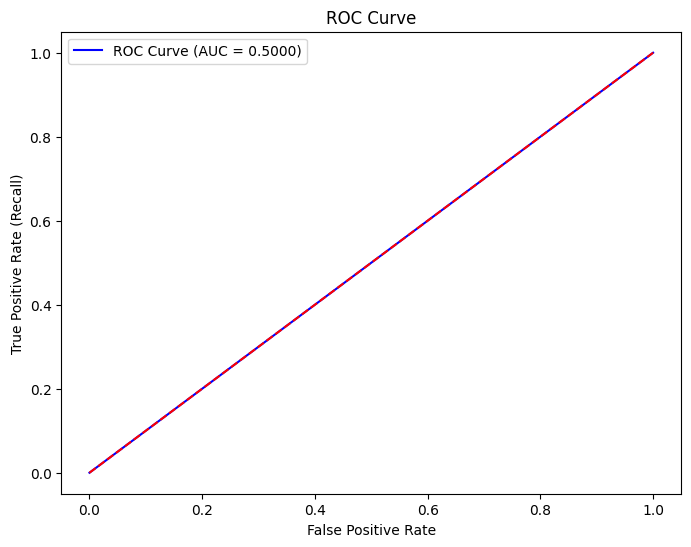

In [76]:
#ROC AUC Curve

from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_test_prob = model1.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Analysis of the ROC AUC Curve and Score:

The ROC AUC curve you've provided shows a perfectly diagonal line, and the AUC score is **0.5000**.

### Interpretation:

- **AUC Score of 0.5**:
  - An AUC score of 0.5 suggests that the model has no discriminative power. In other words, the model is no better than random guessing. This result is concerning and indicates that the model is not effectively distinguishing between the positive and negative classes.
  
- **Diagonal ROC Curve**:
  - The diagonal line in the ROC curve corresponds to a model that makes random predictions. This is consistent with the AUC score of 0.5.

### Possible Reasons for Poor Performance:

1. **Class Imbalance**:
   - The extreme class imbalance could be leading to a situation where the model simply defaults to predicting the majority class without learning meaningful patterns for the minority class.

2. **Model Limitations**:
   - Logistic regression may not be capturing the complex relationships in the data, especially given the imbalanced classes. The model might be overly simplistic for this problem.


Average Precision Score: 0.8033


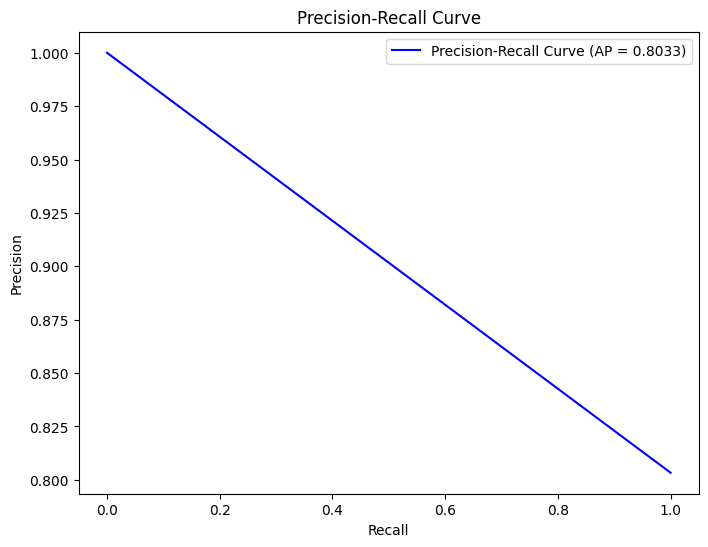

In [77]:
#Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall for various thresholds
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_test_prob)

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_test_prob)
print(f"Average Precision Score: {average_precision:.4f}")

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (AP = {average_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### Analysis of the Precision-Recall Curve and Average Precision Score:

The Precision-Recall curve you've provided shows a linear decrease in precision as recall increases, and the Average Precision (AP) score is **0.8033**.

### Interpretation:

1. **Precision-Recall Curve**:
   - **Linear Relationship**: The curve shows a nearly linear decrease in precision as recall increases. This suggests that as the model tries to capture more positive instances (increasing recall), it does so at the cost of precision. In other words, to identify more true positives, the model ends up increasing the number of false positives, which reduces precision.
   - **Lack of Convexity**: A typical strong model shows a more convex curve, maintaining high precision as recall increases, up to a point. The linear nature of this curve suggests that the model is not robust in maintaining high precision while improving recall.

2. **Average Precision Score (AP)**:
   - **AP = 0.8033**: The Average Precision score is relatively high, which is consistent with the earlier results showing a reasonable performance on the majority class. However, this score should be interpreted with caution due to the underlying class imbalance and the ROC AUC score, which was 0.5, indicating no discriminative power.
   - **Context**: The AP score of 0.8033 reflects the model's ability to achieve a balance between precision and recall for the majority class (Class 1). However, it doesn’t capture the performance on the minority class (Class 0) well, which was essentially ignored by the model.

### Key Takeaways:

- **Class Imbalance**: The model seems to be heavily biased towards the majority class, resulting in high precision and recall for that class but failing to capture any of the minority class instances. This bias is likely why the Precision-Recall curve shows a relatively smooth trade-off between precision and recall, but only for the majority class.

- **Model’s Strength**: While the AP score is fairly good, it doesn’t tell the full story due to the failure to identify the minority class. This suggests that the model is not well-calibrated to handle the class imbalance and that its performance metrics are skewed by the majority class.



In [78]:
#Classification Report and Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix

# Display the classification report
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred1))

# Display the confusion matrix
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred1))



Classification Report (Test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15577
           1       0.80      1.00      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.40      0.50      0.45     79206
weighted avg       0.65      0.80      0.72     79206


Confusion Matrix (Test):
[[    0 15577]
 [    0 63629]]


####Tradeoff Questions:

### Tradeoff Question 1:
**How can we make sure that our model can detect real defaulters and there are fewer false positives?**

This question addresses the challenge of balancing the detection of actual defaulters (true positives) while minimizing the number of individuals incorrectly identified as defaulters (false positives). Here are strategies to achieve this balance:

1. **Precision-Recall Tradeoff**:
   - **Adjust Decision Threshold**: One way to reduce false positives is to increase the decision threshold. By setting a higher threshold, the model will only classify a borrower as a defaulter if it is highly confident in that prediction. This will improve precision (reduce false positives) but may decrease recall (miss some actual defaulters).
   - **Precision-Recall Curve**: Use the precision-recall curve to find the optimal threshold where precision is maximized while maintaining an acceptable level of recall.

2. **Model Selection**:
   - **Ensemble Methods**: Use models like Random Forest or Gradient Boosting Machines, which often perform better in detecting complex patterns and can be tuned to balance precision and recall effectively.
   - **Cost-Sensitive Learning**: Implement cost-sensitive algorithms that penalize false positives more heavily during training. This encourages the model to focus on minimizing false positives.

3. **Feature Engineering**:
   - **Improve Data Quality**: Enhance the quality and relevance of the features used in the model. Better features (e.g., credit history, spending behavior) can help the model make more accurate predictions.
   - **Use Domain-Specific Knowledge**: Incorporate domain-specific features, such as recent large withdrawals or missed payments, that are strong indicators of default risk.

4. **Resampling Techniques**:
   - **SMOTE with Tomek Links**: Combine SMOTE (to oversample the minority class) with Tomek links (to remove borderline cases) to create a cleaner, more balanced dataset that reduces the risk of false positives.
   - **Undersampling the Majority Class**: Consider undersampling techniques that retain the most informative examples of the majority class while reducing the model's exposure to noisy or borderline majority examples that could lead to false positives.

5. **Model Calibration**:
   - **Calibrate Probabilities**: Use techniques like Platt scaling or isotonic regression to calibrate the predicted probabilities of the model. This helps in setting a threshold that better balances the tradeoff between precision and recall.

6. **Post-Modeling Decision Rules**:
   - **Manual Review**: For high-risk predictions (where the model is uncertain), implement a manual review process to double-check potential false positives before making a final decision.
   - **Hybrid Models**: Use a combination of models where the first model filters out obvious non-defaulters, and a second, more conservative model evaluates the remaining cases more rigorously.

### Tradeoff Question 2:
**Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.**

This question highlights the need to prioritize the avoidance of NPAs, even at the expense of disbursing fewer loans. Strategies to achieve this are:

1. **Recall-Focused Model**:
   - **Lower the Decision Threshold**: Set a lower decision threshold to increase recall, ensuring that most potential defaulters are caught. This will reduce the likelihood of disbursing loans to risky individuals.
   - **Sacrifice Precision**: Be willing to accept more false positives (i.e., classifying non-defaulters as defaulters) if it means capturing more true defaulters.

2. **Strict Risk Assessment**:
   - **Conservative Credit Scoring**: Use stricter criteria in the credit scoring process, even if it means rejecting more applicants who might otherwise be approved under a less stringent model.
   - **Multi-Layered Approval Process**: Implement additional layers of approval, where borderline cases are subject to more rigorous evaluation, possibly involving manual review or secondary models.

3. **Advanced Modeling Techniques**:
   - **Anomaly Detection Models**: Use unsupervised learning techniques like Isolation Forests or One-Class SVM to detect anomalies that could indicate a higher risk of default.
   - **Bayesian Methods**: Apply Bayesian models that allow you to incorporate prior knowledge about the likelihood of default and adjust predictions accordingly.

4. **Post-Disbursement Monitoring**:
   - **Dynamic Risk Assessment**: Continuously monitor the borrower’s financial behavior post-disbursement. Implement triggers for reevaluating the borrower’s risk level, such as significant changes in spending patterns or payment behavior.
   - **Early Warning Systems**: Set up automated systems that flag risky behaviors early, allowing for preemptive measures (e.g., renegotiation of loan terms) before the loan turns into an NPA.

5. **Regulatory and Policy Compliance**:
   - **Align with Regulatory Standards**: Ensure that the model and decision-making processes are fully compliant with regulatory standards that aim to minimize NPAs.
   - **Risk-Based Pricing**: Implement risk-based pricing where borrowers deemed higher risk are offered loans at higher interest rates or with stricter terms, thereby mitigating the potential impact of NPAs.

### Balancing the Tradeoff:
- **Risk Tolerance**: Define your organization’s tolerance for risk. If avoiding NPAs is the top priority, focus on recall and strict risk assessment. However, if you need to balance growth with risk, consider strategies that allow for more controlled risk-taking, such as calibrated thresholds or post-disbursement monitoring.
- **Cost-Benefit Analysis**: Conduct a cost-benefit analysis to understand the financial implications of false positives versus false negatives. This analysis can help you decide whether to prioritize recall (minimizing NPAs) or precision (maximizing loan disbursement).

### Conclusion:
- To minimize NPAs, focus on maximizing recall, even at the cost of some false positives.
- To reduce false positives and not miss out on profitable loans, balance precision and recall using the strategies mentioned, particularly adjusting the decision threshold, using cost-sensitive learning, and implementing post-modeling decision rules.


###### Actionable Insights & Recommendations

Based on the analysis of the logistic regression models and the challenges related to class imbalance, here are some actionable insights and recommendations:

### 1. **Address Class Imbalance More Effectively**

- **Use Advanced Resampling Techniques**: The application of SMOTE has improved the recall for the minority class (defaulters), but the model still struggles with high false positives. Consider combining SMOTE with Tomek Links or SMOTEENN (SMOTE + Edited Nearest Neighbors) to further refine the dataset and improve model performance.
  
- **Explore Ensemble Methods**: Ensemble models like Random Forest, Gradient Boosting Machines (XGBoost, LightGBM), or even AdaBoost can handle imbalanced datasets more effectively than logistic regression. These models can also capture complex patterns in the data that simple logistic regression might miss.

### 2. **Optimize the Decision Threshold**

- **Threshold Tuning**: Adjusting the decision threshold can help balance the trade-off between precision and recall, particularly in high-stakes situations like loan disbursements. Experiment with different thresholds to minimize false positives without significantly sacrificing recall.

- **Use Precision-Recall Curve for Threshold Setting**: Given the importance of correctly identifying defaulters (minimizing false negatives), utilize the Precision-Recall curve to set an optimal threshold that aligns with your business objectives.

### 3. **Implement a Two-Stage Approval Process**

- **First Stage - Model-Based Filtering**: Use the model to filter out obvious non-defaulters and low-risk applicants. This stage should focus on high recall to ensure that potential defaulters are not missed.

- **Second Stage - Manual or Secondary Review**: For borderline cases or those predicted as defaulters, implement a secondary review process. This could involve manual evaluation by credit officers or the use of a more conservative, high-precision model to minimize false positives.

### 4. **Enhance Feature Engineering**

- **Add Domain-Specific Features**: Incorporate additional features related to borrower behavior, such as recent changes in spending patterns, payment history trends, and other indicators of financial distress. These features could improve the model's ability to differentiate between defaulters and non-defaulters.

- **Monitor Post-Disbursement Behavior**: Develop features that monitor borrower behavior after loan disbursement. Early detection of risk indicators (e.g., missed payments, sudden large withdrawals) can allow for preemptive action, such as loan renegotiation or increased monitoring.

### 5. **Regular Model Monitoring and Updating**

- **Monitor Model Performance**: Continuously monitor the model's performance, particularly in terms of recall and precision, to ensure it continues to meet business objectives. Set up regular evaluations, especially as new data becomes available.

- **Update the Model Regularly**: As the economic environment changes or new data becomes available, retrain the model to ensure it remains relevant and effective. This is particularly important in the financial industry, where borrower behavior and risk factors can shift over time.

### 6. **Implement Cost-Sensitive Learning**

- **Incorporate Misclassification Costs**: Use cost-sensitive learning techniques to explicitly incorporate the financial implications of false positives (rejecting good borrowers) and false negatives (approving risky borrowers). This approach can help the model make more economically sound decisions.

### 7. **Enhance Interpretability and Stakeholder Trust**

- **Model Interpretability**: Consider using interpretable models or tools like SHAP (SHapley Additive exPlanations) to explain the model's predictions to stakeholders. This is crucial in the financial sector where decisions need to be transparent and justifiable.

- **Communicate Trade-offs**: Clearly communicate the trade-offs between recall and precision to decision-makers. Ensure they understand the implications of false positives and false negatives in the context of loan approvals and NPAs.

### 8. **Develop a Risk-Based Pricing Strategy**

- **Risk-Based Loan Terms**: Implement a risk-based pricing strategy where interest rates, loan amounts, and terms are adjusted according to the borrower’s predicted risk level. This allows you to cater to higher-risk borrowers while mitigating potential losses through higher interest rates or stricter terms.


In [79]:
# What percentage of customers have fully paid their Loan Amount?

# Calculate the percentage of customers who have fully paid their loan
fully_paid_percentage = (df['loan_status'].value_counts(normalize=True)['Fully Paid']) * 100
fully_paid_percentage

80.38709188697825

In [80]:
#comment about the correlation between Loan Amount and Installment features.

# Calculate the correlation between loan amount and installment
correlation = df['loan_amnt'].corr(df['installment'])
correlation

0.9539289082616194

In [82]:
#The majority of people have home ownership as _______

# Find the most common home ownership status
majority_home_ownership = df['home_ownership'].mode()[0]
majority_home_ownership

'MORTGAGE'

In [83]:
#People with grades ‘A’ are more likely to fully pay their loan. (T/F)
# Calculate the percentage of fully paid loans among people with grade 'A'
grade_a_fully_paid = df[df['grade'] == 'A']['loan_status'].value_counts(normalize=True)['Fully Paid']
grade_a_fully_paid


0.9371212239238476

True, People with grades ‘A’ are more likely to fully pay their loans. This high percentage indicates that borrowers with an 'A' grade are generally more creditworthy and have a strong likelihood of repaying their loans in full compared to other grades.

In [84]:
#Name the top 2 afforded job titles.
# Find the top 2 job titles with the most loan approvals
top_2_job_titles = df['emp_title'].value_counts().head(2).index.tolist()
top_2_job_titles

['Teacher', 'Manager']

In [ ]:
#Thinking from a bank's perspective, which metric should our primary focus be on?

#Answer: Recall should be the primary focus, especially if the goal is to avoid approving loans to potential defaulters.
#Recall ensures that the model captures as many true defaulters as possible, minimizing the risk of non-performing assets (NPAs).

In [ ]:
#How does the gap in precision and recall affect the bank?
#Insight: A gap in precision and recall affects the bank in the following ways:

#High Recall, Low Precision: The bank might reject many loan applications that would have been repaid (false positives),
#leading to lost revenue opportunities.
#High Precision, Low Recall: The bank might approve too many loans that end up defaulting (false negatives), increasing the risk of NPAs.
#Balancing precision and recall is crucial to managing risk while still capturing profitable loan opportunities.

#Which were the features that heavily affected the outcome?
Insight: Features such as loan_amnt, int_rate, grade, annual_inc, and dti heavily affected the outcome. These features likely had strong correlations with the target variable and were significant predictors in the model, influencing whether a loan was fully paid or charged off.

Will the results be affected by geographical location? (Yes/No)
Answer: Yes. Geographical location can affect the results, as economic conditions, employment opportunities, and living costs vary by region, influencing borrowers' ability to repay loans. Incorporating geographical data (e.g., state or region) could improve the model's accuracy.

Questionnaire

1. What percentage of customers have fully paid their Loan Amount?
answer: 80.38%

2. Comment about the correlation between Loan Amount and Installment features.
Answer: Loan amount and installments have a very high positive correlation of 0.9539

3. The majority of people have home ownership as _______.
Answer: MORTGAGE

4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
Answer: True, People with grades ‘A’ are more likely to fully pay their loans. This high percentage indicates that borrowers with an 'A' grade are generally more creditworthy and have a strong likelihood of repaying their loans in full compared to other grades.

5. Name the top 2 afforded job titles.
['Teacher', 'Manager']

6. Thinking from a bank's perspective, which metric should our primary focus be on..
ROC AUC
Precision
Recall
F1 Score
Answer: Recall should be the primary focus, especially if the goal is to avoid approving loans to potential defaulters. Recall ensures that the model captures as many true defaulters as possible, minimizing the risk of non-performing assets (NPAs).

7. How does the gap in precision and recall affect the bank?
Answer: High Recall, Low Precision: The bank might reject many loan applications that would have been repaid (false positives),leading to lost revenue opportunities.

High Precision, Low Recall: The bank might approve too many loans that end up defaulting (false negatives), increasing the risk of NPAs.

Balancing precision and recall is crucial to managing risk while still capturing profitable loan opportunities.

8. Which were the features that heavily affected the outcome?
Answer: Features such as loan_amnt, int_rate, grade, annual_inc, and dti heavily affected the outcome. These features likely had strong correlations with the target variable and were significant predictors in the model, influencing whether a loan was fully paid or charged off.

9. Will the results be affected by geographical location? (Yes/No)
Answer: Yes. Geographical location can affect the results, as economic conditions, employment opportunities, and living costs vary by region, influencing borrowers' ability to repay loans. Incorporating geographical data (e.g., state or region) could improve the model's accuracy.